# Softmax Example

In [1]:
# Step 1: Import all necessary modules for classification
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms  # Image preprocessing transformations
import torchvision.datasets as datasets     # Pre-built datasets including MNIST
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader

print("All modules imported successfully!")
print(f"PyTorch version: {torch.__version__}")



All modules imported successfully!
PyTorch version: 2.7.1+cu126


In [2]:
# Step 1.1: Load the MNIST Dataset

transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL Image to tensor and normalize to [0,1]
])

# Load training dataset

train_dataset = datasets.MNIST(
    root='./data',           # Directory to store/load the dataset
    train=True,              # Load training set (60,000 images)
    download=True,           # Download if not already present
    transform=transform      # Apply ToTensor transformation
)

# Load validation/test dataset

validation_dataset = datasets.MNIST(
    root='./data',           # Same directory as training data
    train=False,             # Load test set (10,000 images)
    download=True,           # Download if not already present
    transform=transform      # Apply same transformation
)

print(f"Training dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(validation_dataset)}")
print(f"Number of classes: {len(train_dataset.classes)}")
print(f"Class names: {train_dataset.classes}")



Training dataset size: 60000
Validation dataset size: 10000
Number of classes: 10
Class names: ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


In [3]:
# Step 1.2: Examine the dataset structure

# Get the first training sample
first_sample = train_dataset[0]
print(f"\nFirst sample type: {type(first_sample)}")
print(f"Tuple length: {len(first_sample)}")

# Extract image and label from the tuple
first_image, first_label = first_sample
print(f"\nImage tensor shape: {first_image.shape}")  # [1, 28, 28] = [channels, height, width]
print(f"Image tensor dtype: {first_image.dtype}")    # float32 after ToTensor()
print(f"Label: {first_label}")                       # Integer class (0-9)
print(f"Label type: {type(first_label)}")            # Python int

# Get the second training sample to show consistency
second_image, second_label = train_dataset[1]
print(f"\nSecond sample - Image shape: {second_image.shape}, Label: {second_label}")




First sample type: <class 'tuple'>
Tuple length: 2

Image tensor shape: torch.Size([1, 28, 28])
Image tensor dtype: torch.float32
Label: 5
Label type: <class 'int'>

Second sample - Image shape: torch.Size([1, 28, 28]), Label: 0



DETAILED TENSOR ANALYSIS
Image dimensions: torch.Size([1, 28, 28])
  - Channels: 1 (grayscale)
  - Height: 28 pixels
  - Width: 28 pixels

Pixel value statistics:
  - Minimum value: 0.0000
  - Maximum value: 1.0000
  - Mean value: 0.1377

Label information:
  - Raw label: 5
  - Label type: <class 'int'>
  - As tensor: 5
  - Tensor dtype: torch.int64


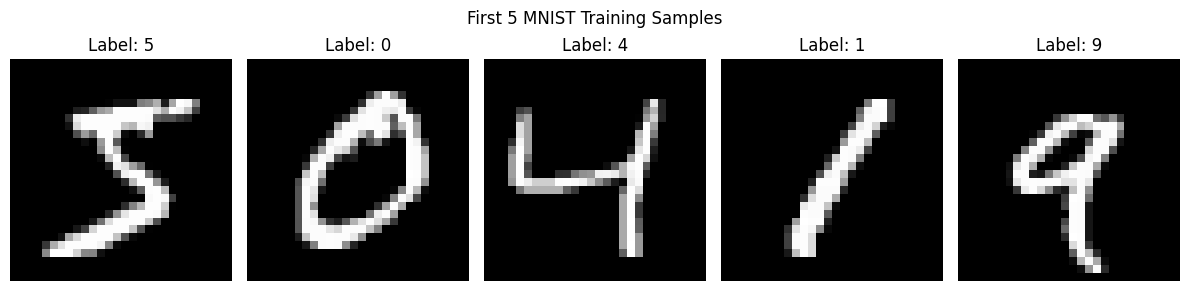


Step 1 Complete: Data successfully loaded and examined!


In [4]:
# Step 1.3: Examine tensor properties in detail
print(f"\n{'='*50}")
print("DETAILED TENSOR ANALYSIS")
print(f"{'='*50}")

# The image tensor has shape [1, 28, 28]
print(f"Image dimensions: {first_image.shape}")
print(f"  - Channels: {first_image.shape[0]} (grayscale)")
print(f"  - Height: {first_image.shape[1]} pixels")
print(f"  - Width: {first_image.shape[2]} pixels")

# Pixel value range after ToTensor() transformation
print(f"\nPixel value statistics:")
print(f"  - Minimum value: {first_image.min().item():.4f}")
print(f"  - Maximum value: {first_image.max().item():.4f}")
print(f"  - Mean value: {first_image.mean().item():.4f}")

# The label is stored as a Python int, but for PyTorch loss functions
# we need it as a Long tensor (torch.int64)
print(f"\nLabel information:")
print(f"  - Raw label: {first_label}")
print(f"  - Label type: {type(first_label)}")
print(f"  - As tensor: {torch.tensor(first_label)}")
print(f"  - Tensor dtype: {torch.tensor(first_label).dtype}")

# Visualize the first few samples
fig, axes = plt.subplots(1, 5, figsize=(12, 3))
for i in range(5):
    image, label = train_dataset[i]
    # Remove channel dimension for plotting: [1, 28, 28] → [28, 28]
    image_2d = image.squeeze(0)
    
    axes[i].imshow(image_2d, cmap='gray')
    axes[i].set_title(f'Label: {label}')
    axes[i].axis('off')

plt.suptitle('First 5 MNIST Training Samples')
plt.tight_layout()
plt.show()

print("\nStep 1 Complete: Data successfully loaded and examined!")

In [5]:
# Step 2: Create the Softmax Classifier Model

# Define our custom Softmax classifier using nn.Module
class SoftmaxClassifier(nn.Module):
    def __init__(self, input_size, output_size):

        # Call parent class constructor
        super(SoftmaxClassifier, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        # Apply linear transformation to get class scores (logits)
        # No activation function needed here - CrossEntropyLoss handles softmax
        logits = self.linear(x)
        return logits


In [6]:
# Step 2.1: Calculate input and output dimensions
print("Model Architecture Planning:")
print("="*40)

# MNIST images are 28x28 pixels
image_height = 28
image_width = 28

# We need to flatten 2D images into 1D vectors for the linear layer
# Input dimension = height × width = 28 × 28 = 784
input_dim = image_height * image_width
print(f"Input dimension: {image_height} × {image_width} = {input_dim}")

# MNIST has 10 classes (digits 0 through 9)
output_dim = 10
print(f"Output dimension: {output_dim} (classes 0-9)")

Model Architecture Planning:
Input dimension: 28 × 28 = 784
Output dimension: 10 (classes 0-9)


In [7]:
# Step 2.2: Instantiate the model
model = SoftmaxClassifier(input_size=input_dim, output_size=output_dim)

print(f"\nModel created successfully!")
print(f"Model type: {type(model)}")



Model created successfully!
Model type: <class '__main__.SoftmaxClassifier'>


In [8]:
# Step 2.3: Examine model architecture and parameters
print(f"\n{'='*50}")
print("MODEL ARCHITECTURE DETAILS")
print(f"{'='*50}")

# Display the model structure
print("Model architecture:")
print(model)

# Count total parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"\nParameter Summary:")
print(f"  - Total parameters: {total_params:,}")
print(f"  - Trainable parameters: {trainable_params:,}")

# Examine each parameter in detail
print(f"\nDetailed Parameter Analysis:")
for name, param in model.named_parameters():
    print(f"  - {name}:")
    print(f"    Shape: {param.shape}")
    print(f"    Elements: {param.numel():,}")
    print(f"    Requires gradient: {param.requires_grad}")
    print(f"    Data type: {param.dtype}")


MODEL ARCHITECTURE DETAILS
Model architecture:
SoftmaxClassifier(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

Parameter Summary:
  - Total parameters: 7,850
  - Trainable parameters: 7,850

Detailed Parameter Analysis:
  - linear.weight:
    Shape: torch.Size([10, 784])
    Elements: 7,840
    Requires gradient: True
    Data type: torch.float32
  - linear.bias:
    Shape: torch.Size([10])
    Elements: 10
    Requires gradient: True
    Data type: torch.float32


In [9]:
# Step 2.4: Understand parameter dimensions
print(f"\n{'='*50}")
print("PARAMETER MATHEMATICS")
print(f"{'='*50}")

# Access weight and bias parameters
weight_matrix = model.linear.weight  # Shape: [10, 784]
bias_vector = model.linear.bias      # Shape: [10]

print(f"Weight Matrix (W):")
print(f"  - Shape: {weight_matrix.shape}")
print(f"  - Meaning: [output_classes, input_features] = [10, 784]")
print(f"  - Each row represents weights for one class")
print(f"  - Total weight parameters: {weight_matrix.numel():,}")

print(f"\nBias Vector (b):")
print(f"  - Shape: {bias_vector.shape}")
print(f"  - Meaning: One bias value per output class")
print(f"  - Total bias parameters: {bias_vector.numel()}")

print(f"\nMathematical Operation:")
print(f"  For input x with shape [batch_size, 784]:")
print(f"  Output = x @ W.T + b")
print(f"  Result shape: [batch_size, 10]")


PARAMETER MATHEMATICS
Weight Matrix (W):
  - Shape: torch.Size([10, 784])
  - Meaning: [output_classes, input_features] = [10, 784]
  - Each row represents weights for one class
  - Total weight parameters: 7,840

Bias Vector (b):
  - Shape: torch.Size([10])
  - Meaning: One bias value per output class
  - Total bias parameters: 10

Mathematical Operation:
  For input x with shape [batch_size, 784]:
  Output = x @ W.T + b
  Result shape: [batch_size, 10]



INITIAL PARAMETER VISUALIZATION
Initial weight parameters (before training):
These look like random noise because PyTorch initializes weights randomly


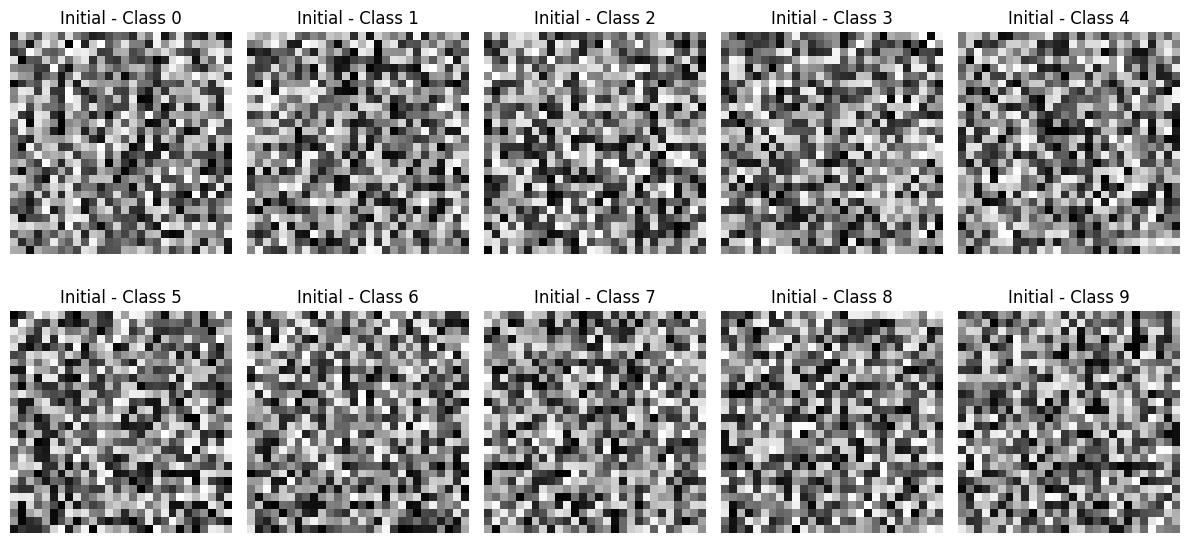

In [10]:
# Step 2.5: Visualize initial weight parameters
# Since PyTorch initializes parameters randomly, they look like noise initially
print(f"\n{'='*50}")
print("INITIAL PARAMETER VISUALIZATION")
print(f"{'='*50}")

# Function to plot weight parameters as images
def plot_parameters(model, title_prefix=""):
    # Get weight matrix: shape [10, 784]
    weights = model.linear.weight.data
    
    # Reshape each row back to 28x28 image format
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))
    axes = axes.flatten()
    
    for i in range(10):
        # Get weights for class i and reshape to 28x28
        class_weights = weights[i].reshape(28, 28)
        
        # Plot as grayscale image
        axes[i].imshow(class_weights, cmap='gray')
        axes[i].set_title(f'{title_prefix}Class {i}')
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Plot initial random weights
print("Initial weight parameters (before training):")
print("These look like random noise because PyTorch initializes weights randomly")
plot_parameters(model, "Initial - ")


In [11]:
# Step 2.6: Test model with sample input
print(f"\n{'='*50}")
print("MODEL FORWARD PASS TEST")
print(f"{'='*50}")

# Create a sample input tensor
# Shape: [1, 784] for batch_size=1
sample_input = torch.randn(1, 784)
print(f"Sample input shape: {sample_input.shape}")

# Run forward pass
with torch.no_grad():  # Don't compute gradients for this test
    sample_output = model(sample_input)

print(f"Sample output shape: {sample_output.shape}")
print(f"Sample output (logits): {sample_output}")

# Show that softmax converts logits to probabilities
softmax = nn.Softmax(dim=1)
probabilities = softmax(sample_output)
print(f"Softmax probabilities: {probabilities}")
print(f"Probability sum: {probabilities.sum().item():.6f}")  # Should be 1.0

# Get predicted class
_, predicted_class = torch.max(sample_output, 1)
print(f"Predicted class: {predicted_class.item()}")

print("\nStep 2 Complete: Model successfully created and tested!")


MODEL FORWARD PASS TEST
Sample input shape: torch.Size([1, 784])
Sample output shape: torch.Size([1, 10])
Sample output (logits): tensor([[ 1.2068, -0.3308, -0.2923,  0.6248, -0.2802, -0.8765,  0.3447, -0.1707,
         -0.4493,  0.0136]])
Softmax probabilities: tensor([[0.2844, 0.0611, 0.0635, 0.1589, 0.0643, 0.0354, 0.1201, 0.0717, 0.0543,
         0.0862]])
Probability sum: 1.000000
Predicted class: 0

Step 2 Complete: Model successfully created and tested!


In [12]:
# Step 3: Training Setup and Implementation

# Step 3.1: Define Loss Function and Optimizer
print("Setting up training components...")
print("="*40)

# CrossEntropyLoss combines LogSoftmax and NLLLoss
# It automatically applies softmax to model outputs and computes negative log-likelihood
# This is the standard loss function for multi-class classification
criterion = nn.CrossEntropyLoss()

print("Loss function: CrossEntropyLoss")
print("  - Automatically applies softmax to model outputs")
print("  - Computes negative log-likelihood loss")
print("  - Expects raw logits (not probabilities) as input")
print("  - Expects target labels as LongTensor with shape [batch_size]")

# Define optimizer for gradient descent
# We use SGD (Stochastic Gradient Descent) with a learning rate
learning_rate = 0.01
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

print(f"\nOptimizer: SGD")
print(f"  - Learning rate: {learning_rate}")
print(f"  - Updates all model parameters that require gradients")

Setting up training components...
Loss function: CrossEntropyLoss
  - Automatically applies softmax to model outputs
  - Computes negative log-likelihood loss
  - Expects raw logits (not probabilities) as input
  - Expects target labels as LongTensor with shape [batch_size]

Optimizer: SGD
  - Learning rate: 0.01
  - Updates all model parameters that require gradients


In [13]:
# Step 3.2: Create Data Loaders
print(f"\n{'='*50}")
print("CREATING DATA LOADERS")
print(f"{'='*50}")

# Training data loader with batch processing
batch_size_train = 100  # Process 100 samples at a time during training
train_loader = DataLoader(
    dataset=train_dataset,     # Use the training dataset
    batch_size=batch_size_train,  # Number of samples per batch
    shuffle=True,              # Randomly shuffle data each epoch
    num_workers=0              # Number of subprocesses for data loading
)

print(f"Training DataLoader:")
print(f"  - Batch size: {batch_size_train}")
print(f"  - Total batches: {len(train_loader)}")
print(f"  - Shuffle: True (randomizes order each epoch)")

# Validation data loader with larger batch size (faster evaluation)
batch_size_val = 5000  # Larger batches for validation (no gradient computation)
validation_loader = DataLoader(
    dataset=validation_dataset,
    batch_size=batch_size_val,
    shuffle=False,             # No need to shuffle for evaluation
    num_workers=0
)

print(f"\nValidation DataLoader:")
print(f"  - Batch size: {batch_size_val}")
print(f"  - Total batches: {len(validation_loader)}")
print(f"  - Shuffle: False (consistent evaluation order)")


CREATING DATA LOADERS
Training DataLoader:
  - Batch size: 100
  - Total batches: 600
  - Shuffle: True (randomizes order each epoch)

Validation DataLoader:
  - Batch size: 5000
  - Total batches: 2
  - Shuffle: False (consistent evaluation order)


In [14]:
# Step 3.3: Training Parameters and Tracking Variables
print(f"\n{'='*50}")
print("TRAINING CONFIGURATION")
print(f"{'='*50}")

# Number of epochs (complete passes through the training data)
num_epochs = 5
print(f"Number of epochs: {num_epochs}")

# Lists to track training progress
train_losses = []        # Track training loss per epoch
train_accuracies = []    # Track training accuracy per epoch
val_accuracies = []      # Track validation accuracy per epoch

print(f"Tracking metrics:")
print(f"  - Training loss per epoch")
print(f"  - Training accuracy per epoch") 
print(f"  - Validation accuracy per epoch")


TRAINING CONFIGURATION
Number of epochs: 5
Tracking metrics:
  - Training loss per epoch
  - Training accuracy per epoch
  - Validation accuracy per epoch


In [15]:
# Step 3.4: Understanding the View Operation
print(f"\n{'='*50}")
print("DATA PREPROCESSING: THE VIEW OPERATION")
print(f"{'='*50}")

# Demonstrate the view() operation used to flatten images
sample_batch_images, sample_batch_labels = next(iter(train_loader))
print(f"Original batch shape: {sample_batch_images.shape}")  # [batch_size, 1, 28, 28]

# The view() method reshapes tensors without copying data
# -1 means "infer this dimension" based on other dimensions and total elements
flattened_batch = sample_batch_images.view(sample_batch_images.size(0), -1)
print(f"After view(-1, 784): {flattened_batch.shape}")      # [batch_size, 784]

print(f"\nExplanation of view() operation:")
print(f"  - Original: [batch_size, channels, height, width] = [100, 1, 28, 28]")
print(f"  - view(batch_size, -1) flattens spatial dimensions")
print(f"  - Result: [batch_size, height*width] = [100, 784]")
print(f"  - This converts 2D images to 1D feature vectors for the linear layer")


DATA PREPROCESSING: THE VIEW OPERATION
Original batch shape: torch.Size([100, 1, 28, 28])
After view(-1, 784): torch.Size([100, 784])

Explanation of view() operation:
  - Original: [batch_size, channels, height, width] = [100, 1, 28, 28]
  - view(batch_size, -1) flattens spatial dimensions
  - Result: [batch_size, height*width] = [100, 784]
  - This converts 2D images to 1D feature vectors for the linear layer


In [25]:
# Step 3.5: Training Loop Implementation
print(f"\n{'='*50}")
print("STARTING TRAINING")
print(f"{'='*50}")

# Reset training history lists
train_losses = []
train_accuracies = []
val_accuracies = []


# Main training loop
for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    print("-" * 20)
    model.train()
    
    # Variables to track training progress within this epoch
    epoch_train_loss = 0.0
    correct_train = 0
    total_train = 0
    
    # Iterate through training batches
    for batch_idx, (images, labels) in enumerate(train_loader):
        # Flatten images from [batch_size, 1, 28, 28] to [batch_size, 784]
        images = images.view(images.size(0), -1)  # Flatten to 1D vectors
        # Pass images through the model to get predictions
        outputs = model(images)  # Shape: [batch_size, 10] - logits for each class
        loss = criterion(outputs, labels)# - labels: class indices [batch_size] as LongTensor
        optimizer.zero_grad()         # Clear gradients from previous iteration
        loss.backward()               # Compute gradients via backpropagation
        optimizer.step()              # Update model parameters using computed gradients
        # Step 3.5.5: Track training statistics
        epoch_train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)  # Get class with highest score
        total_train += labels.size(0)              # Add batch size to total
        correct_train += (predicted == labels).sum().item()  # Count correct predictions
        
        # Print progress every 100 batches
        if (batch_idx + 1) % 100 == 0:
            current_accuracy = 100.0 * correct_train / total_train
            print(f'  Batch {batch_idx+1}/{len(train_loader)}, '
                  f'Loss: {loss.item():.4f}, '
                  f'Training Accuracy: {current_accuracy:.2f}%')
    
    # Calculate epoch statistics
    avg_train_loss = epoch_train_loss / len(train_loader)
    train_accuracy = 100.0 * correct_train / total_train
    
        # Step 3.6: Validation/Testing
    print(f"\n  Evaluating on validation set...")
    
    # Set model to evaluation mode
    # This disables dropout and sets batch norm to eval mode (not used here)
    model.eval()
    
    correct_val = 0
    total_val = 0
    
    # Disable gradient computation for efficiency during evaluation
    with torch.no_grad():
        for val_images, val_labels in validation_loader:
            # Flatten validation images the same way as training
            val_images = val_images.view(val_images.size(0), -1)
            
            # Forward pass
            val_outputs = model(val_images)
            
            # Calculate predictions
            _, val_predicted = torch.max(val_outputs.data, 1)
            total_val += val_labels.size(0)
            correct_val += (val_predicted == val_labels).sum().item()
    
    # Calculate validation accuracy
    val_accuracy = 100.0 * correct_val / total_val
    
    # Store metrics for plotting
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    
    # Print epoch summary
    print(f"  Epoch {epoch+1} Summary:")
    print(f"    Training Loss: {avg_train_loss:.4f}")
    print(f"    Training Accuracy: {train_accuracy:.2f}%")
    print(f"    Validation Accuracy: {val_accuracy:.2f}%")

print(f"\n{'='*50}")
print("TRAINING COMPLETED!")
print(f"{'='*50}")


STARTING TRAINING

Epoch 1/5
--------------------
  Batch 100/600, Loss: 0.4278, Training Accuracy: 89.28%
  Batch 200/600, Loss: 0.3419, Training Accuracy: 89.49%
  Batch 300/600, Loss: 0.4051, Training Accuracy: 89.60%
  Batch 400/600, Loss: 0.3129, Training Accuracy: 89.73%
  Batch 500/600, Loss: 0.4503, Training Accuracy: 89.75%
  Batch 600/600, Loss: 0.3373, Training Accuracy: 89.75%

  Evaluating on validation set...
  Epoch 1 Summary:
    Training Loss: 0.3771
    Training Accuracy: 89.75%
    Validation Accuracy: 90.48%

Epoch 2/5
--------------------
  Batch 100/600, Loss: 0.3487, Training Accuracy: 90.30%
  Batch 200/600, Loss: 0.2472, Training Accuracy: 89.83%
  Batch 300/600, Loss: 0.4619, Training Accuracy: 89.66%
  Batch 400/600, Loss: 0.5349, Training Accuracy: 89.73%
  Batch 500/600, Loss: 0.4385, Training Accuracy: 89.72%
  Batch 600/600, Loss: 0.4231, Training Accuracy: 89.87%

  Evaluating on validation set...
  Epoch 2 Summary:
    Training Loss: 0.3707
    Trainin

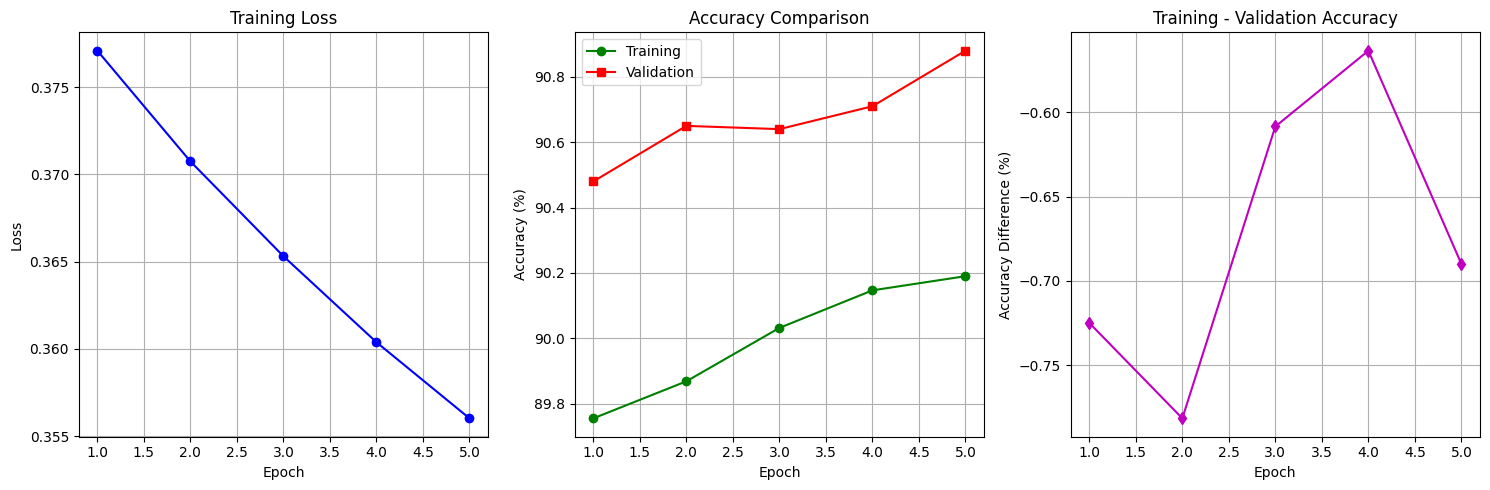

Step 3 Complete: Model successfully trained!


In [26]:
# Step 3.7: Plot Training Progress
plt.figure(figsize=(15, 5))

# Plot 1: Training Loss
plt.subplot(1, 3, 1)
plt.plot(range(1, num_epochs + 1), train_losses, 'b-', marker='o')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)


# Plot 2: Training Accuracy
plt.subplot(1, 3, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, 'g-', marker='o', label='Training')
plt.plot(range(1, num_epochs + 1), val_accuracies, 'r-', marker='s', label='Validation')
plt.title('Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

# Plot 3: Accuracy Difference
plt.subplot(1, 3, 3)
acc_diff = [train_acc - val_acc for train_acc, val_acc in zip(train_accuracies, val_accuracies)]
plt.plot(range(1, num_epochs + 1), acc_diff, 'm-', marker='d')
plt.title('Training - Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Difference (%)')
plt.grid(True)

plt.tight_layout()
plt.show()

print("Step 3 Complete: Model successfully trained!")

Analyzing learned weight parameters...
Learned weight parameters (after training):
These should now resemble the digit classes they represent!


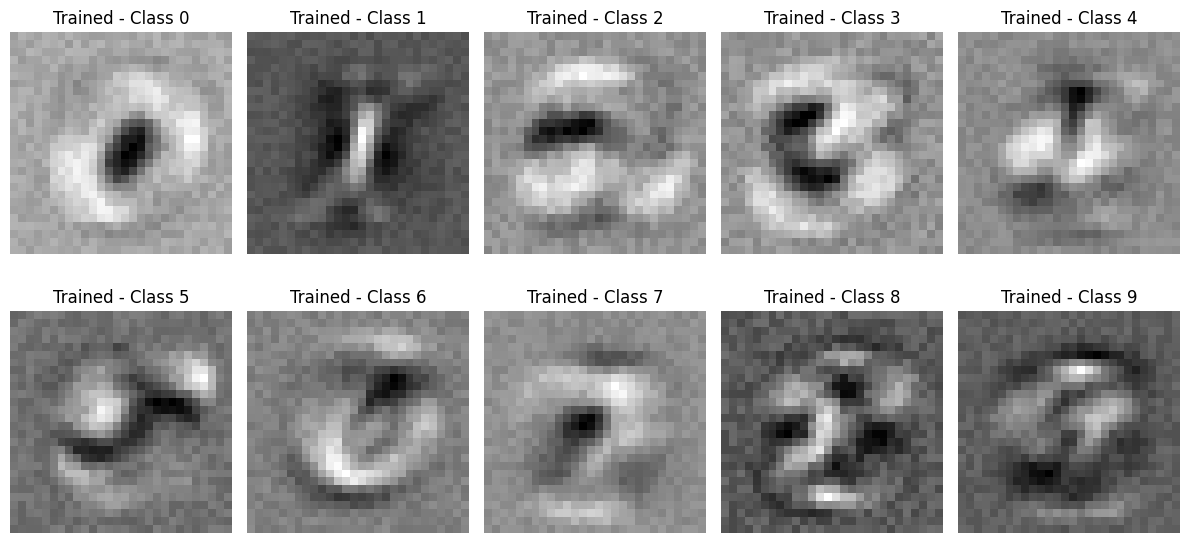

In [27]:
# Step 4: Viewing and Analyzing Results

# Step 4.1: Visualize Learned Weight Parameters
print("Analyzing learned weight parameters...")
print("="*40)

# After training, the weight parameters should look like the digit classes
# Each row of the weight matrix learns to detect features specific to one digit
print("Learned weight parameters (after training):")
print("These should now resemble the digit classes they represent!")
plot_parameters(model, "Trained - ")


BEFORE vs AFTER TRAINING COMPARISON


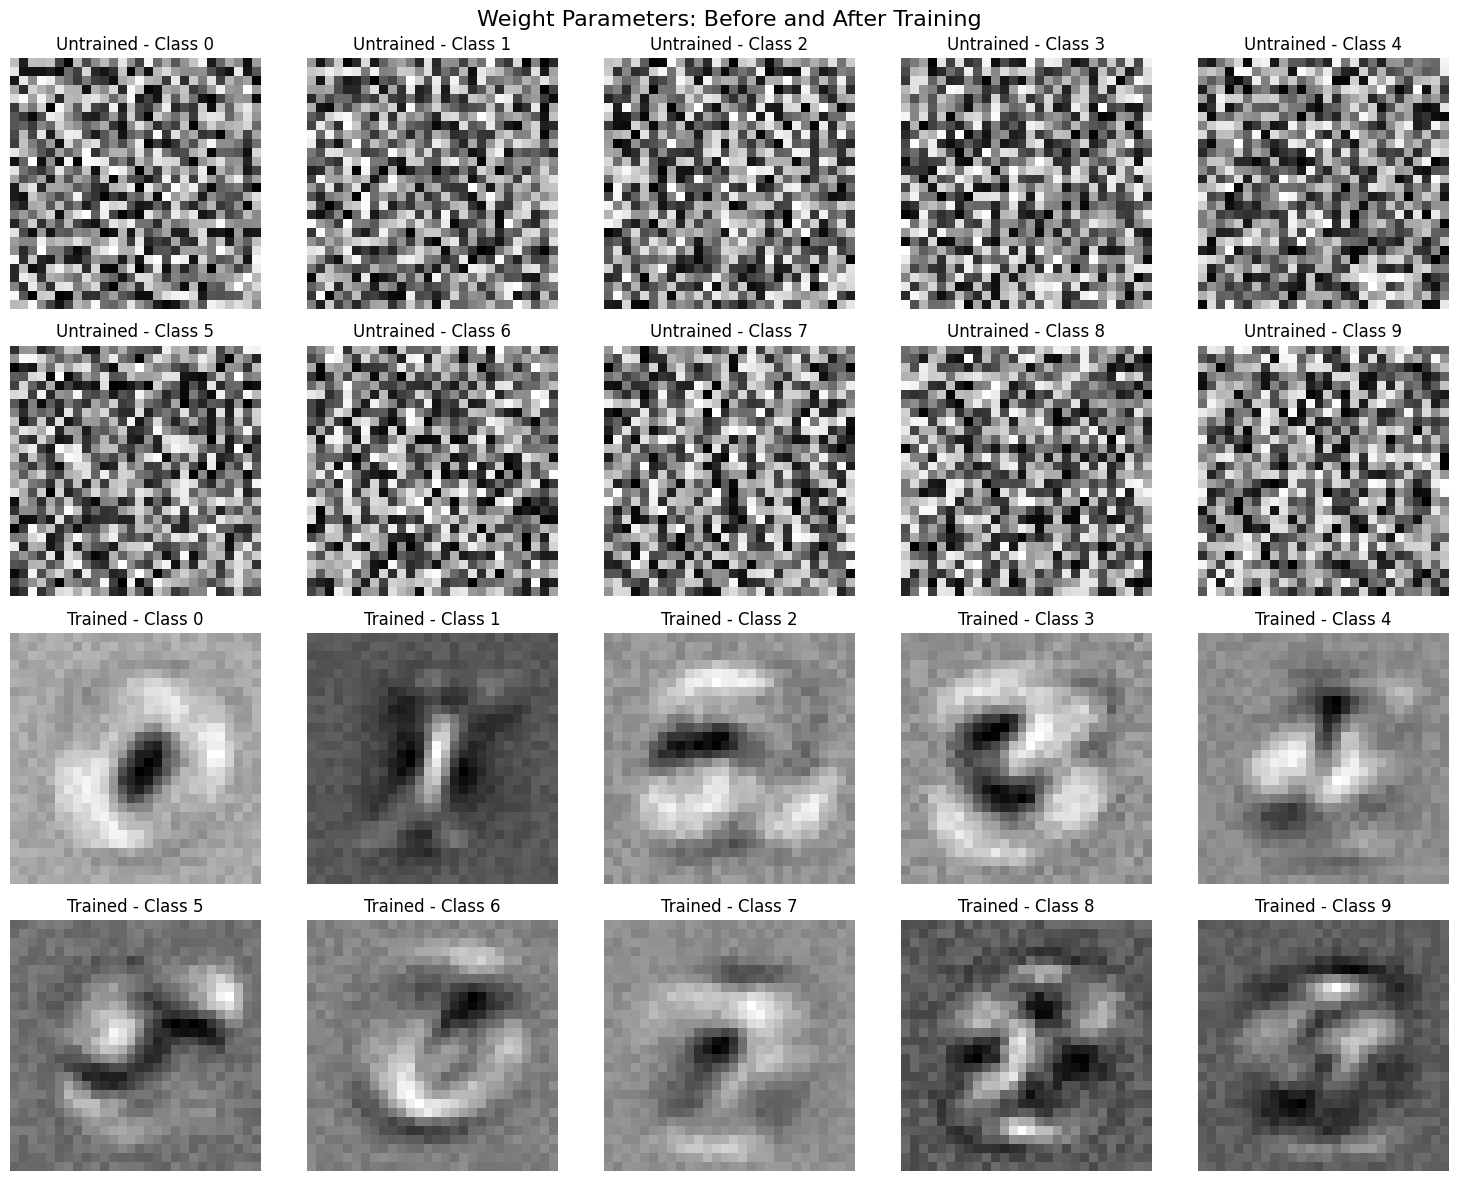

In [28]:
# Step 4.2: Compare Before and After Training
print(f"\n{'='*50}")
print("BEFORE vs AFTER TRAINING COMPARISON")
print(f"{'='*50}")

# Create a new untrained model for comparison
untrained_model = SoftmaxClassifier(input_dim, output_dim)

# Plot side by side comparison
fig, axes = plt.subplots(4, 5, figsize=(15, 12))

# Plot untrained weights (top 2 rows)
untrained_weights = untrained_model.linear.weight.data
for i in range(10):
    row = i // 5
    col = i % 5
    class_weights = untrained_weights[i].reshape(28, 28)
    axes[row, col].imshow(class_weights, cmap='gray')
    axes[row, col].set_title(f'Untrained - Class {i}')
    axes[row, col].axis('off')

# Plot trained weights (bottom 2 rows)
trained_weights = model.linear.weight.data
for i in range(10):
    row = (i // 5) + 2
    col = i % 5
    class_weights = trained_weights[i].reshape(28, 28)
    axes[row, col].imshow(class_weights, cmap='gray')
    axes[row, col].set_title(f'Trained - Class {i}')
    axes[row, col].axis('off')

plt.suptitle('Weight Parameters: Before and After Training', fontsize=16)
plt.tight_layout()
plt.show()



DETAILED PREDICTION ANALYSIS
Analyzing predictions on validation samples:


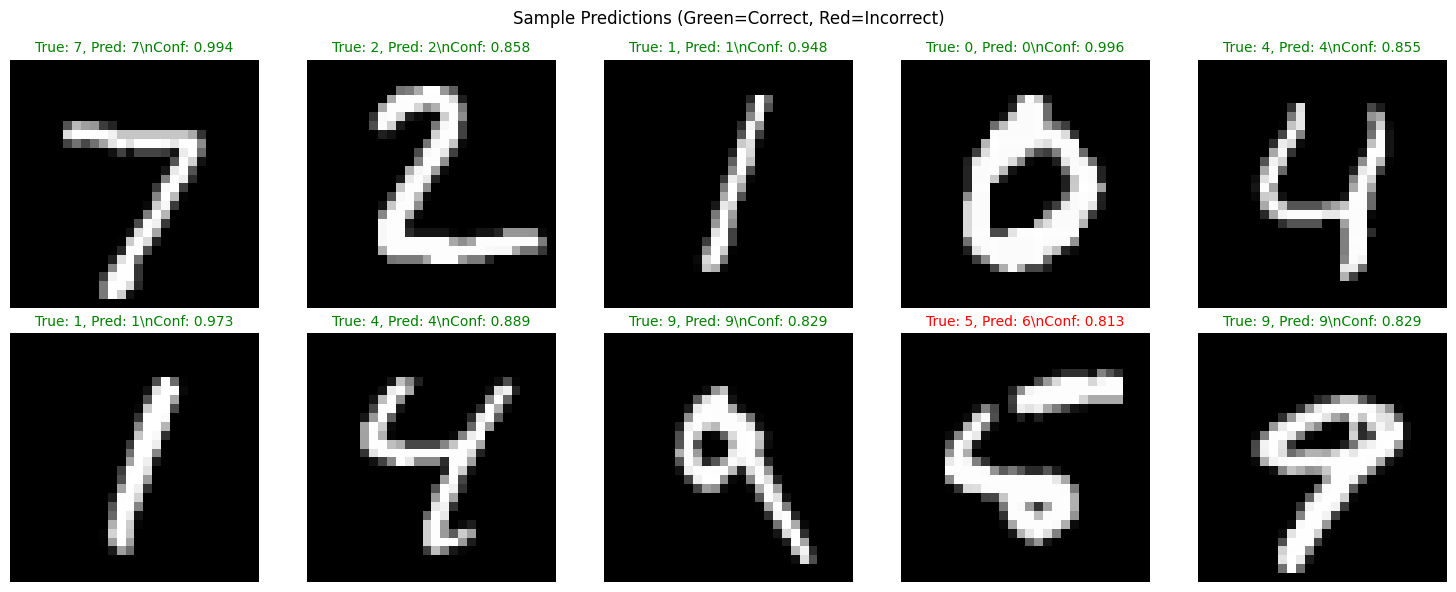

Sample Analysis Results:
  - Correct predictions: 9/10
  - Sample accuracy: 90.0%
  - Average confidence: 0.898


In [29]:
# Step 4.3: Detailed Prediction Analysis
print(f"\n{'='*50}")
print("DETAILED PREDICTION ANALYSIS")
print(f"{'='*50}")

# Function to analyze model predictions in detail
def analyze_predictions(model, data_loader, num_samples=10):
    model.eval()
    # Get a batch of test samples
    images, true_labels = next(iter(data_loader))
    # Take only the first num_samples
    images = images[:num_samples]
    true_labels = true_labels[:num_samples]
    # Flatten images for model input
    flattened_images = images.view(images.size(0), -1)
    
    # Get model predictions
    with torch.no_grad():
        outputs = model(flattened_images)
        probabilities = torch.softmax(outputs, dim=1)
        _, predicted_labels = torch.max(outputs, 1)
    
    # Create visualization
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.flatten()
    
    for i in range(num_samples):
        # Plot the image
        image_2d = images[i].squeeze(0)
        axes[i].imshow(image_2d, cmap='gray')
        
        # Get prediction details
        true_label = true_labels[i].item()
        pred_label = predicted_labels[i].item()
        confidence = probabilities[i, pred_label].item()
        
        # Color code: green for correct, red for incorrect
        color = 'green' if true_label == pred_label else 'red'
        
        # Set title with prediction info
        axes[i].set_title(f'True: {true_label}, Pred: {pred_label}\\nConf: {confidence:.3f}', 
                         color=color, fontsize=10)
        axes[i].axis('off')
    
    plt.suptitle('Sample Predictions (Green=Correct, Red=Incorrect)')
    plt.tight_layout()
    plt.show()
    
    # Print detailed statistics
    correct = (predicted_labels == true_labels).sum().item()
    accuracy = correct / num_samples
    
    print(f"Sample Analysis Results:")
    print(f"  - Correct predictions: {correct}/{num_samples}")
    print(f"  - Sample accuracy: {accuracy:.1%}")
    
    # Show confidence distribution
    avg_confidence = probabilities.max(dim=1)[0].mean().item()
    print(f"  - Average confidence: {avg_confidence:.3f}")
    
    return outputs, probabilities, predicted_labels

# Analyze predictions on validation set
print("Analyzing predictions on validation samples:")
val_outputs, val_probabilities, val_predictions = analyze_predictions(model, validation_loader)


CONFUSION MATRIX ANALYSIS


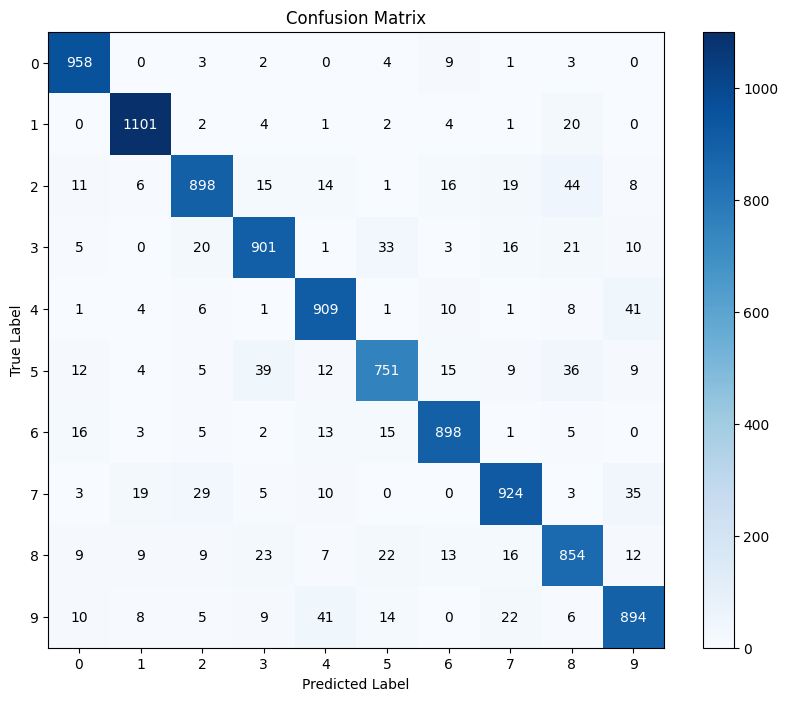

Per-class accuracy:
  Class 0: 97.8% (958/980)
  Class 1: 97.0% (1101/1135)
  Class 2: 87.0% (898/1032)
  Class 3: 89.2% (901/1010)
  Class 4: 92.6% (909/982)
  Class 5: 84.2% (751/892)
  Class 6: 93.7% (898/958)
  Class 7: 89.9% (924/1028)
  Class 8: 87.7% (854/974)
  Class 9: 88.6% (894/1009)


In [30]:
# Step 4.4: Confusion Matrix Analysis
print(f"\n{'='*50}")
print("CONFUSION MATRIX ANALYSIS")
print(f"{'='*50}")

# Function to create confusion matrix
def create_confusion_matrix(model, data_loader):
    """
    Create and visualize confusion matrix
    """
    model.eval()
    all_predictions = []
    all_labels = []
    
    with torch.no_grad():
        for images, labels in data_loader:
            flattened = images.view(images.size(0), -1)
            outputs = model(flattened)
            _, predicted = torch.max(outputs, 1)
            
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # Create confusion matrix
    confusion_matrix = np.zeros((10, 10), dtype=int)
    for true_label, pred_label in zip(all_labels, all_predictions):
        confusion_matrix[true_label, pred_label] += 1
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    plt.imshow(confusion_matrix, cmap='Blues')
    plt.colorbar()
    
    # Add text annotations
    for i in range(10):
        for j in range(10):
            plt.text(j, i, str(confusion_matrix[i, j]), 
                    ha='center', va='center',
                    color='white' if confusion_matrix[i, j] > confusion_matrix.max()/2 else 'black')
    
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(range(10))
    plt.yticks(range(10))
    plt.show()
    
    return confusion_matrix

# Create confusion matrix
confusion_mat = create_confusion_matrix(model, validation_loader)

# Calculate per-class accuracy
print("Per-class accuracy:")
for i in range(10):
    class_correct = confusion_mat[i, i]
    class_total = confusion_mat[i, :].sum()
    class_accuracy = class_correct / class_total if class_total > 0 else 0
    print(f"  Class {i}: {class_accuracy:.1%} ({class_correct}/{class_total})")

In [31]:
# Step 4.5: Understanding the torch.max Operation
print(f"\n{'='*50}")
print("UNDERSTANDING TORCH.MAX FOR CLASSIFICATION")
print(f"{'='*50}")

# Demonstrate torch.max with sample predictions
sample_images, sample_labels = next(iter(validation_loader))
sample_flattened = sample_images[:5].view(5, -1)  # Take 5 samples

with torch.no_grad():
    sample_outputs = model(sample_flattened)

print("Sample logits (raw model outputs):")
for i, logits in enumerate(sample_outputs):
    print(f"Sample {i+1}: {logits.numpy()}")

print("\\nUsing torch.max(outputs, dim=1):")
values, indices = torch.max(sample_outputs, dim=1)
print(f"Max values: {values}")
print(f"Max indices (predictions): {indices}")
print(f"True labels: {sample_labels[:5]}")

# Show step-by-step comparison
print("\\nStep-by-step comparison:")
for i in range(5):
    true_label = sample_labels[i].item()
    pred_label = indices[i].item()
    max_logit = values[i].item()
    
    # Create binary comparison vector
    comparison = (indices[i] == sample_labels[i]).int()
    
    print(f"Sample {i+1}: True={true_label}, Pred={pred_label}, Max_logit={max_logit:.3f}, Match={comparison.item()}")

# Calculate accuracy using the comparison method shown in the video
matches = (indices == sample_labels[:5]).int()
print(f"\\nBinary match vector: {matches}")
print(f"Sum of matches: {matches.sum().item()}")
print(f"Accuracy: {matches.sum().item()}/{len(matches)} = {matches.float().mean().item():.1%}")


UNDERSTANDING TORCH.MAX FOR CLASSIFICATION
Sample logits (raw model outputs):
Sample 1: [-0.06971954 -5.617981   -0.12489979  1.9051981  -1.6443278  -1.0960093
 -4.41019     8.151526   -0.42443103  2.364812  ]
Sample 2: [ 2.5258634 -1.3771228  6.602921   2.9502244 -7.225427   3.0472806
  4.101098  -7.7249002  2.1340742 -5.3817744]
Sample 3: [-3.1959164   5.0366263   0.93828666  0.24728088 -1.8520466  -0.90168756
 -0.21501705 -0.02123667  0.6527555  -1.0858017 ]
Sample 4: [ 8.7347355  -8.735091    0.82774675 -0.7456231  -5.150598    2.3269854
  1.8110929   0.9562602   0.0678218  -0.582825  ]
Sample 5: [-1.0726223  -5.1522117   0.53735197 -2.0569932   4.609159   -1.4265239
  0.36403546  1.0221578   0.69991255  2.117765  ]
\nUsing torch.max(outputs, dim=1):
Max values: tensor([8.1515, 6.6029, 5.0366, 8.7347, 4.6092])
Max indices (predictions): tensor([7, 2, 1, 0, 4])
True labels: tensor([7, 2, 1, 0, 4])
\nStep-by-step comparison:
Sample 1: True=7, Pred=7, Max_logit=8.152, Match=1
Sample 

In [34]:
# Step 4.6: Final Model Performance Summary
print(f"\n{'='*50}")
print("FINAL MODEL PERFORMANCE SUMMARY")
print(f"{'='*50}")

# Complete evaluation on entire validation set
model.eval()
total_correct = 0
total_samples = 0

with torch.no_grad():
    for images, labels in validation_loader:
        flattened = images.view(images.size(0), -1)
        outputs = model(flattened)
        _, predicted = torch.max(outputs, 1)
        
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

final_accuracy = total_correct / total_samples

print(f"Final Results:")
print(f"  - Total test samples: {total_samples:,}")
print(f"  - Correctly classified: {total_correct:,}")
print(f"  - Final accuracy: {final_accuracy:.1%}")
print(f"  - Error rate: {1-final_accuracy:.1%}")

# Compare with random guessing
random_accuracy = 1/10  # 10% for 10 classes
improvement = final_accuracy / random_accuracy

print(f"\nComparison with random guessing:")
print(f"  - Random accuracy: {random_accuracy:.1%}")
print(f"  - Our model accuracy: {final_accuracy:.1%}")
print(f"  - Improvement factor: {improvement:.1f}x")




FINAL MODEL PERFORMANCE SUMMARY
Final Results:
  - Total test samples: 10,000
  - Correctly classified: 9,088
  - Final accuracy: 90.9%
  - Error rate: 9.1%

Comparison with random guessing:
  - Random accuracy: 10.0%
  - Our model accuracy: 90.9%
  - Improvement factor: 9.1x
